In [1]:
import f3dasm
import numpy as np
import copy
import pandas as pd

2022-11-17 17:04:47.787822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 17:04:47.876580: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
seed = 2021
dim = 2
iterations = 1000
bounds = np.tile([-1.0,1.0], (dim, 1))
design = f3dasm.make_nd_continuous_design(bounds=bounds, dimensionality=dim)

function = f3dasm.functions.Ackley(dimensionality=dim, scale_bounds=bounds, seed=seed, noise=0.2)

data = f3dasm.Data(design=design)
optimizer = f3dasm.optimization.Adam(data=data, seed=seed)
sampler = f3dasm.sampling.LatinHypercube(design=design, seed=seed)

(<Figure size 700x700 with 1 Axes>,
 <Axes3DSubplot: xlabel='$X_{0}$', ylabel='$X_{1}$', zlabel='$f(X)$'>)

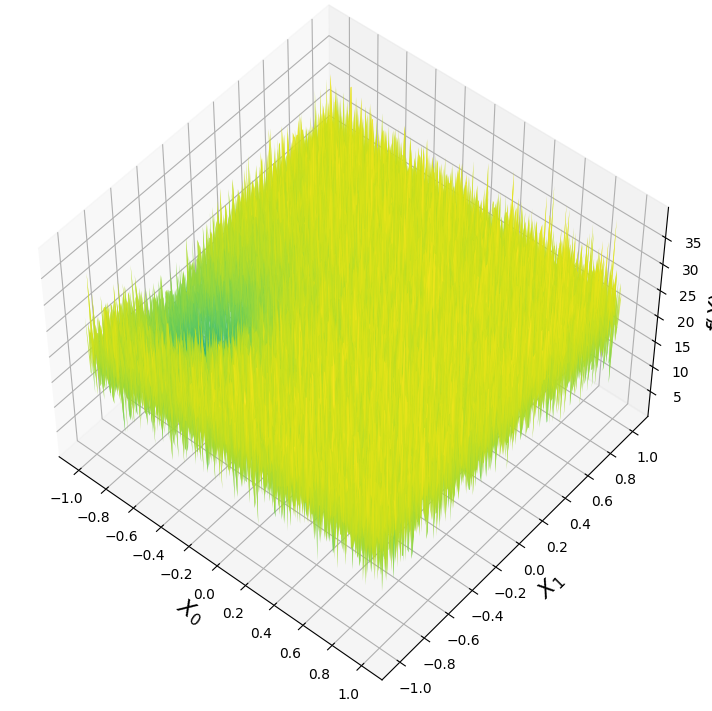

In [3]:
function.plot(px=300,domain=bounds)

In [4]:
samples = sampler.get_samples(30)
samples.add_output(output=function(samples))
samples

Data(design=DesignSpace(input_space=[ContinuousParameter(name='x0', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x1', _type='float', lower_bound=-1.0, upper_bound=1.0)], output_space=[ContinuousParameter(name='y', _type='float', lower_bound=-inf, upper_bound=inf)]), data=       input               output
          x0        x1          y
0  -0.800184  0.622814  17.553645
1  -0.689189 -0.402410   3.869026
2   0.362815  0.332118  19.964517
3   0.592710  0.428786  23.311932
4  -0.098812  0.258116  25.077024
5  -0.425565 -0.858123  16.090709
6   0.220071  0.843395  17.487332
7   0.876974 -0.078460  24.152193
8   0.642455 -0.319877  27.100445
9  -0.161086  0.341755  20.058922
10  0.305977  0.687010  24.120225
11  0.976508  0.042899  24.595679
12 -0.228713 -0.062063  18.325499
13 -0.535840  0.513934  23.372539
14 -0.361713 -0.912488  22.890818
15  0.174499 -0.681046  17.581124
16  0.527729 -0.375256  17.265916
17 -0.788067 -0.495915  10.948278
18  0.721586  0.

In [5]:
optimizer.set_data(copy.copy(samples))
optimizer.iterate(iterations=iterations, function=function)

2022-11-17 17:05:04.788890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Optimizing for 1000 iterations with Adam


In [6]:
optimizer.data

Data(design=DesignSpace(input_space=[ContinuousParameter(name='x0', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x1', _type='float', lower_bound=-1.0, upper_bound=1.0)], output_space=[ContinuousParameter(name='y', _type='float', lower_bound=-inf, upper_bound=inf)]), data=         input               output
            x0        x1          y
0    -0.800184  0.622814  17.553645
1    -0.689189 -0.402410   3.869026
2     0.362815  0.332118  19.964517
3     0.592710  0.428786  23.311932
4    -0.098812  0.258116  25.077024
...        ...       ...        ...
1025 -0.692550 -0.404209   2.788744
1026 -0.692550 -0.404209   3.299251
1027 -0.692550 -0.404209   4.479742
1028 -0.692550 -0.404209   3.256822
1029 -0.692550 -0.404209   3.132438

[1030 rows x 3 columns])

In [7]:
from f3dasm.base.metaoptimizer import MetaOptimizer, EqualParts_Strategy

In [8]:
optimizer_1 = f3dasm.optimization.RandomSearch(data=samples, seed=seed)
optimizer_2 = f3dasm.optimization.Adam(data=samples, seed=seed)
optimizer_3 = f3dasm.optimization.SGD(data=samples, seed=seed)


strategy= EqualParts_Strategy(optimizers=[optimizer_1, optimizer_2, optimizer_3])


metaoptimizer = MetaOptimizer(data=samples, strategy=strategy, seed=seed)

In [9]:
metaoptimizer.iterate(iterations=iterations, function=function)

Optimizing for 333 iterations with RandomSearch
Optimizing for 333 iterations with Adam
Optimizing for 334 iterations with SGD


(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='$X_{0}$', ylabel='$X_{1}$'>)

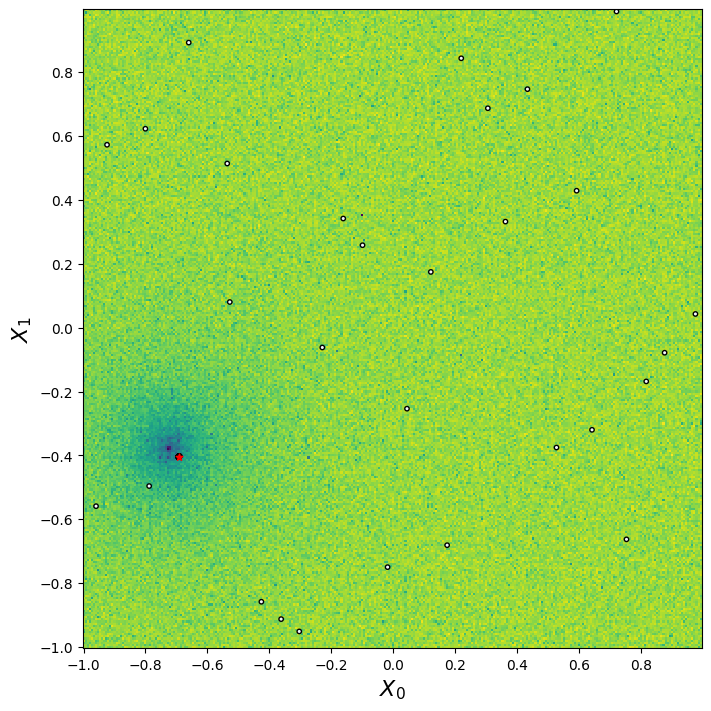

In [10]:
function.plot_data(data=optimizer.extract_data(), domain=bounds)

(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='$X_{0}$', ylabel='$X_{1}$'>)

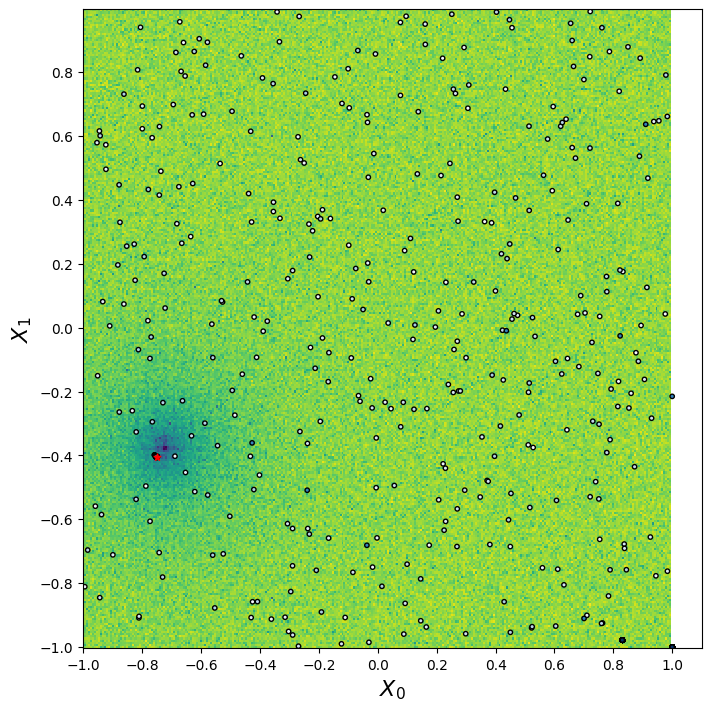

In [11]:
function.plot_data(data=metaoptimizer.extract_data(),domain=bounds)

In [12]:
# pd.set_option('display.max_rows', None)
# metaoptimizer.data.data

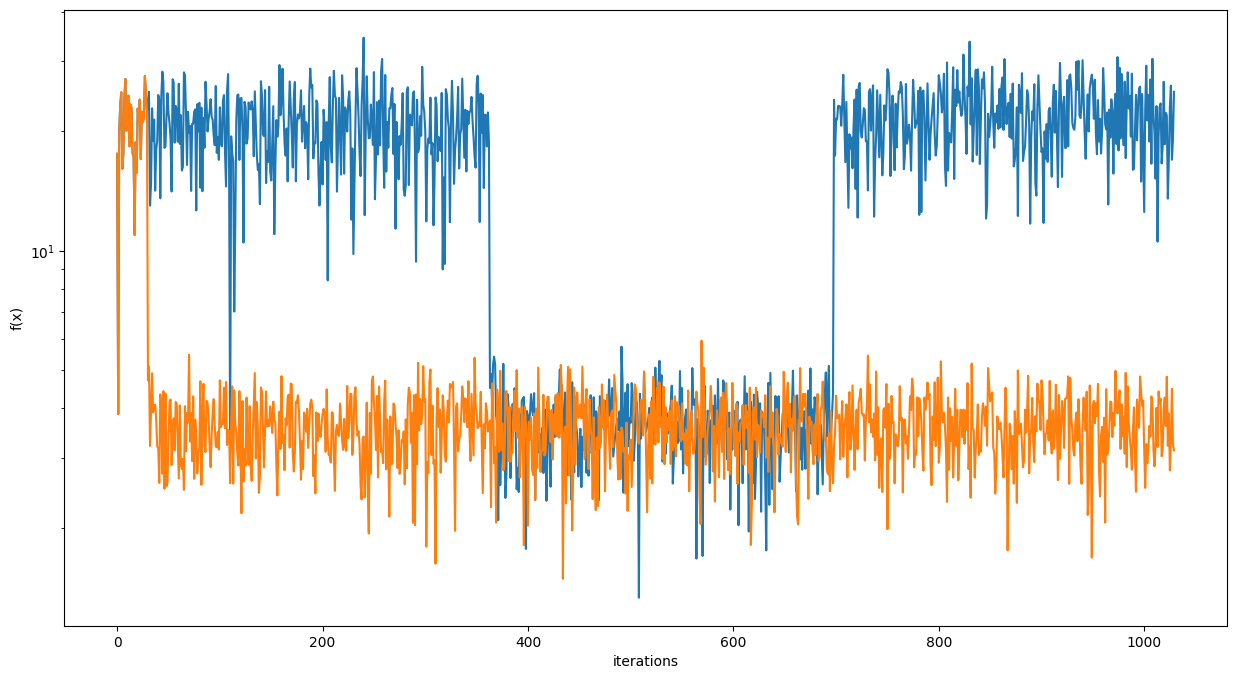

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('f(x)')
ax.set_yscale('log')
ax.plot(metaoptimizer.data.get_output_data())
ax.plot(optimizer.data.get_output_data())

In [14]:
len(metaoptimizer.data.data), len(optimizer.data.data)

(1030, 1030)

In [15]:
np.array([[parameter.lower_bound, parameter.upper_bound] for parameter in design.input_space])
    

array([[-1.,  1.],
       [-1.,  1.]])